In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [43]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [44]:
x_train = train_datagen.flow_from_directory(r"C:\Users\HP\Downloads\mokey_train\training",target_size=(64,64),batch_size=32,class_mode="categorical")
x_test = test_datagen.flow_from_directory(r"C:\Users\HP\Downloads\monkey_test\validation",target_size=(64,64),batch_size=32,class_mode="categorical")

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


In [45]:
print(x_train.class_indices)

{'n0': 0, 'n1': 1, 'n2': 2, 'n3': 3, 'n4': 4, 'n5': 5, 'n6': 6, 'n7': 7, 'n8': 8, 'n9': 9}


# Model building

In [46]:
model = Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

In [47]:
model.add(Dense(units=128,activation="relu"))

In [48]:
model.add(Dense(units=10,activation="softmax"))

In [49]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [50]:
model.fit(x_train,steps_per_epoch=34,epochs=20,validation_data=x_test,validation_steps=9)

Epoch 1/20
34/34 [==============================] - 39s 1s/step - loss: 2.3414 - accuracy: 0.2242 - val_loss: 1.7582 - val_accuracy: 0.3787
Epoch 2/20
34/34 [==============================] - 38s 1s/step - loss: 1.6125 - accuracy: 0.4475 - val_loss: 1.5491 - val_accuracy: 0.4926
Epoch 3/20
34/34 [==============================] - 37s 1s/step - loss: 1.4010 - accuracy: 0.5281 - val_loss: 1.5766 - val_accuracy: 0.4632
Epoch 4/20
34/34 [==============================] - 38s 1s/step - loss: 1.2112 - accuracy: 0.5947 - val_loss: 1.4694 - val_accuracy: 0.4963
Epoch 5/20
34/34 [==============================] - 38s 1s/step - loss: 1.1231 - accuracy: 0.6220 - val_loss: 1.2715 - val_accuracy: 0.5662
Epoch 6/20
34/34 [==============================] - 38s 1s/step - loss: 1.0282 - accuracy: 0.6632 - val_loss: 1.4572 - val_accuracy: 0.4963
Epoch 7/20
34/34 [==============================] - 38s 1s/step - loss: 0.9953 - accuracy: 0.6670 - val_loss: 1.4103 - val_accuracy: 0.5441
Epoch 8/20
34/34 [==

In [ ]:
#85% accuracy achived

# Model Saving

In [51]:
model.save("monkeys.h5")

# Testing

In [52]:
from tensorflow.keras.models import load_model
from  keras.preprocessing import image
import numpy as np

In [53]:
model = load_model("monkeys.h5")

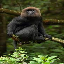

In [54]:
#loading an image og nilgiri langur to see if our model can predict it or not
img = image.load_img("nilgiri_langur.jfif",target_size=(64,64))
img

In [55]:
x = image.img_to_array(img)
x.shape


(64, 64, 3)

In [56]:
x = np.expand_dims(x,axis=0)
x.shape

(1, 64, 64, 3)

In [57]:
y = model.predict(x)
y

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [58]:
pred = np.argmax(y,axis=1)
pred

array([9], dtype=int64)

In [59]:
x_train.class_indices

{'n0': 0,
 'n1': 1,
 'n2': 2,
 'n3': 3,
 'n4': 4,
 'n5': 5,
 'n6': 6,
 'n7': 7,
 'n8': 8,
 'n9': 9}

In [60]:
index = ["mantled_howler", "patas_monkey", "bald_uakari", "japanese_macaque",  "pygmy_marmoset", "white_headed_capuchin","silvery_marmoset", "common_squirrel_monkey", "black_headed_night_monkey" ,"nilgiri_langur" ]
index[pred[0]]

'nilgiri_langur'

### Hence our model predicted the right class